<a href="https://colab.research.google.com/github/Matrixbrs/-finan-as-python-/blob/main/Benja(Indice-Sharpe)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sharpe

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
etfs= ["XLV","XLI","EEM","MCHI"]
start='2022-01-01'
end='2025-05-16'
pesos=np.array([0.20,0.20,0.27,0.33])


In [ ]:
#cálculo taxa livre de risco

dados_livre= yf.download('^IRX', start, end)['Close']
livre_risco= (dados_livre.dropna().mean().item()/100)/252
livre_risco

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


0.00015954475438587402

In [ ]:
carteira= yf.download(etfs, start, end)['Close']

retornos=carteira.pct_change().dropna()
retorno_carteira = (retornos*pesos).sum(axis=1)
retorno_excesso= (retorno_carteira - livre_risco)

[*********************100%***********************]  4 of 4 completed


In [ ]:
volatilidade_carteira = retorno_carteira.std()
print ("Volatilidade Carteira", volatilidade_carteira)

Volatilidade Carteira 0.010300977288977416


In [ ]:
sharpe_carteira= retorno_excesso.mean()/volatilidade_carteira
print ("Sharpe carteira", sharpe_carteira)


Sharpe carteira 0.0028691080092219205


In [ ]:
print(f"Volatilidade Carteira: {volatilidade_carteira:.5f}")
print(f"Sharpe da Carteira (diário): {sharpe_carteira:.5f}")
print(f"Sharpe da Carteira (anual): {sharpe_carteira * np.sqrt(252):.2f}")

Volatilidade Carteira: 0.01030
Sharpe da Carteira (diário): 0.00287
Sharpe da Carteira (anual): 0.05


In [ ]:
def calcular_metricas_etfs(retornos_df, risco_livre):
    resultados = []

    for ativo in retornos_df.columns:
        retorno = retornos_df[ativo]
        retorno_medio = retorno.mean()
        volatilidade = retorno.std()
        excesso = retorno_medio - risco_livre
        sharpe = excesso / volatilidade
        sharpe_anual = sharpe * np.sqrt(252)

        resultados.append({
            "Ativo": ativo,
            "Retorno": retorno_medio,
            "Volatilidade": volatilidade,
            "Sharpe Diário": sharpe,
            "Sharpe Anual": sharpe_anual
        })

    return pd.DataFrame(resultados)

In [ ]:
df_resultados = calcular_metricas_etfs(retornos, livre_risco)

In [ ]:
print("\n--- Métricas Diárias Automáticas dos ETFs ---")
print(df_resultados.to_string(index=False, float_format="%.5f"))


--- Métricas Diárias Automáticas dos ETFs ---
Ativo  Retorno  Volatilidade  Sharpe Diário  Sharpe Anual
  EEM  0.00009       0.01210       -0.00592      -0.09392
 MCHI  0.00015       0.02137       -0.00040      -0.00635
  XLI  0.00049       0.01160        0.02842       0.45116
  XLV  0.00003       0.00954       -0.01380      -0.21912


In [ ]:
#benchmarck
benchmark= yf.download('SPY', start, end)['Close']

retornos_benchmarck =benchmark.pct_change().dropna()

retorno_excesso_benchmark = retornos_benchmarck - livre_risco

volatilidade_benchmark = retornos_benchmarck.std()
sharpe_benchmark= retorno_excesso_benchmark.mean()/volatilidade_benchmark
sharpe_benchmark_anual = sharpe_benchmark * np.sqrt(252)
sharpe_benchmark
print("Sharpe_benchmark", sharpe_benchmark)
print("Sharpe_benchmark_anual", sharpe_benchmark_anual)

[*********************100%***********************]  1 of 1 completed

Sharpe_benchmark Ticker
SPY    0.018243
dtype: float64
Sharpe_benchmark_anual Ticker
SPY    0.289599
dtype: float64


In [ ]:
print("volatilidade_benchmark",volatilidade_benchmark)

volatilidade_benchmark Ticker
SPY    0.011994
dtype: float64


In [ ]:
print("Sharpe_benchmarck", sharpe_benchmark)

Sharpe_benchmarck Ticker
SPY    0.018243
dtype: float64


In [ ]:
print("Sharpe_benchmarck_anual", sharpe_benchmark_anual)

Sharpe_benchmarck_anual Ticker
SPY    0.289599
dtype: float64


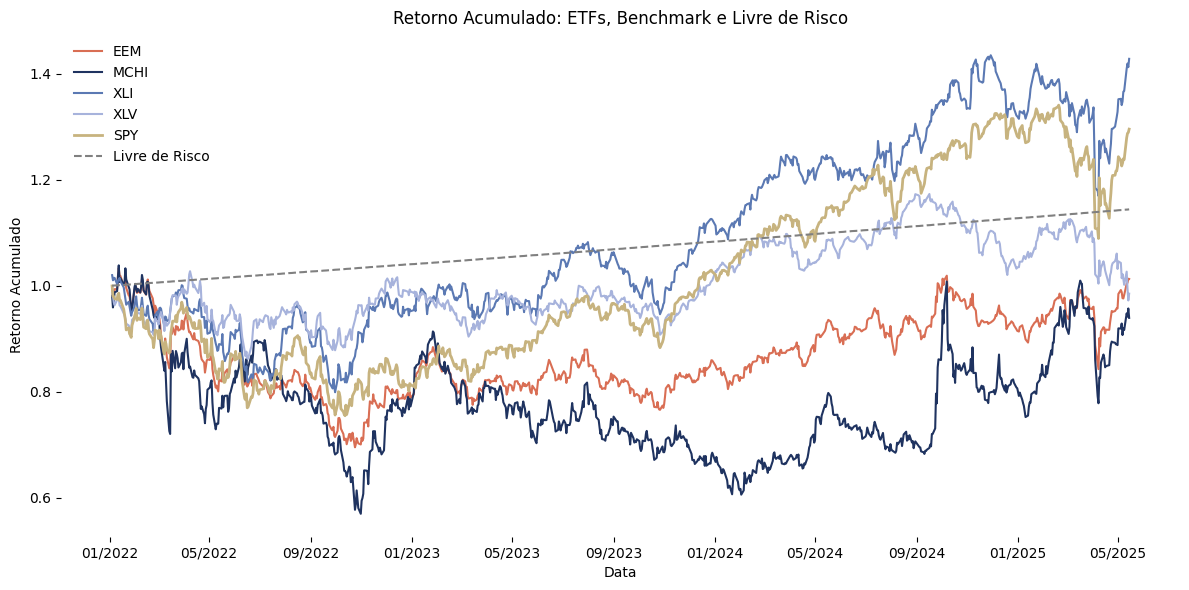

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calcula os retornos acumulados
retorno_acumulado_etfs = (1 + retornos).cumprod()
retorno_acumulado_benchmark = (1 + retornos_benchmarck).cumprod()
retorno_acumulado_risco_livre = (1 + pd.Series(livre_risco, index=retorno_carteira.index)).cumprod()

# Dicionário de cores
cores = {
    "XLV": "#a7b3dc",
    "XLI": "#5b79b3",
    "EEM": "#d96e54",
    "MCHI": "#1f3360",
    "SPY": "#c7b37f",
    "Livre de Risco": "gray"
}

# Cria a figura e o eixo
fig, ax = plt.subplots(figsize=(12, 6))

# Formata o eixo x para mm/aaaa
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

# Plota os ETFs
for ativo in retorno_acumulado_etfs.columns:
    ax.plot(retorno_acumulado_etfs.index, retorno_acumulado_etfs[ativo], label=ativo, color=cores.get(ativo))

# Plota o benchmark
ax.plot(retorno_acumulado_benchmark.index, retorno_acumulado_benchmark, label="SPY", color=cores["SPY"], linewidth=2)

# Plota o retorno livre de risco
ax.plot(retorno_acumulado_risco_livre.index, retorno_acumulado_risco_livre, label="Livre de Risco", color=cores["Livre de Risco"], linestyle='--')

# Estilização
ax.set_title("Retorno Acumulado: ETFs, Benchmark e Livre de Risco")
ax.set_xlabel("Data")
ax.set_ylabel("Retorno Acumulado")
ax.legend(loc="upper left", frameon=False)

# Remove bordas do gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Ativa ou desativa a grade
ax.grid(False)

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()
